In [5]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

from evaluation import evaluate
from synthetic_data_generator import synthetic_data_generator
from src.algorithms.dagmm import DAGMM
from src.algorithms import RecurrentEBM

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [6]:
def binary_label(pred):
    threshold = np.mean(pred) + 2*np.std(pred)
    return np.where(pred >= threshold, 1, 0)

In [7]:
def plot_DBESM_errors(X_test, pred):
    threshold_line = len(X_test) * [np.mean(pred) + 2*np.std(pred)]
    #plt.subplot(211)
    for col in X_test.columns:
        plt.plot(X_test[col], color="black")
    #plt.subplot(212)
    plt.plot(np.arange(len(X_test)), [x/100 for x in pred])
    plt.plot([x/100 for x in threshold_line])
    plt.legend()
    plt.title('Reconstruction error DBESM')
    plt.show()

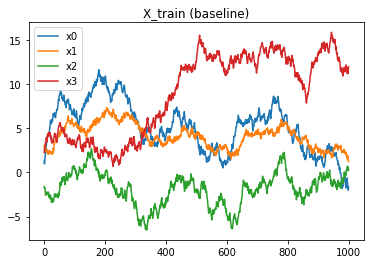

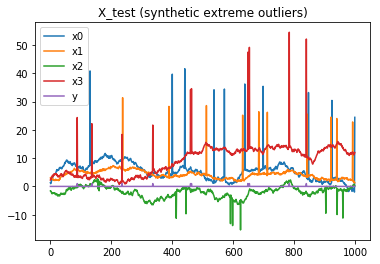

 25%|██▌       | 25/100 [00:00<00:00, 244.85it/s]

In [ ]:
def main():
    data_generator = synthetic_data_generator()
    X_train, y_train, X_test, y_test = data_generator.generate_outliers("extreme")
    
    y_pred = [] # predicted binary labels of all models
    
    ReEBM = RecurrentEBM(num_epochs=100)
    ReEBM.fit(X_train, None)
    pred = ReEBM.predict(X_test)
    y_pred.append(binary_label(pred))
    plot_DBESM_errors(X_test, pred)
    
    #dagmm = DAGMM()
    #dagmm.fit(X_train.values, y_train)
    #pred = dagmm.predict(X_test)
    #y_pred.append(pred)
    
    working_models = ["DBESM"]
    evaluate(y_test.values, y_pred, working_models)

if __name__ == '__main__':
    main()